In [124]:
# Dependencies
import requests
from config import api_key
import time

url = "https://api.themoviedb.org/3/movie/"

In [125]:
import pprint
import random
movies_rating = []
movies_genre = []
movies_budget = []
movies_revenue = []
movies_title = []
movies_date = []
movies_runtime = []
movies_country = []

for movieid in range(0,1350):
    #random.randint(a, b)
    query_url = f"{url}{movieid+200}?api_key={api_key}"
    #query_url = f"{url}{movieid+121}?api_key={api_key}"
    # create query with page number
    
    movies = requests.get(query_url).json()
   
    #for article in articles['budget']:
    #    article.dropna(inplace=True)
    try:
        movies_rating.append(movies["popularity"])
        movies_genre.append(movies["genres"][0]['name'])
        movies_budget.append(movies['budget'])
        movies_revenue.append(movies['revenue'])
        movies_title.append(movies['original_title'])
        movies_date.append(movies['release_date'])
        movies_runtime.append(movies['runtime'])
        movies_country.append(movies["production_countries"][0]['name'])
    except:
        # Append null values
        print("Character not found")
        pass

    

Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found


In [138]:
type(movies_rating)

list

In [144]:
del movies_rating[-1]

In [145]:
len(movies_rating)

841

In [146]:
del movies_genre[-1]

In [147]:
len(movies_genre)

841

In [148]:
del movies_budget[-1]
len(movies_budget)

841

In [149]:
del movies_revenue[-1]
len(movies_revenue)

841

In [150]:
del movies_title[-1]
len(movies_title)

841

In [151]:
del movies_date[-1]
len(movies_date)

841

In [153]:
del movies_runtime[-1]
len(movies_runtime)

841

In [137]:
len(movies_country)

841

In [154]:
import pandas as pd
movie_df = pd.DataFrame()

movie_df['popularity'] = movies_rating
movie_df['budget'] = movies_budget
movie_df['revenue'] = movies_revenue
movie_df['genre'] = movies_genre
movie_df['title'] = movies_title
movie_df['release date'] = movies_date
movie_df['run time'] = movies_runtime
movie_df['movies_country'] = movies_country

In [155]:
movie_df

,popularity,budget,revenue,genre,title,release date,run time,movies_country
0,19.061,70000000,118000000,Science Fiction,Star Trek: Insurrection,1998-12-11,103,United States of America
1,23.766,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
2,16.862,500000,3000000,Drama,Mean Streets,1973-10-14,112,United States of America
3,13.942,0,0,Drama,Le Salaire de la peur,1953-04-22,153,France
4,17.024,17500000,38000000,Drama,Hotel Rwanda,2004-03-04,121,Italy
...,...,...,...,...,...,...,...,...
836,18.275,0,3743833,Drama,Emmas Glück,2006-07-16,103,Germany
837,21.670,0,2455831,Drama,Imagine Me & You,2005-05-16,93,United States of America
838,3.430,0,1919197,Comedy,Thumbsucker,2005-01-23,96,United States of America
839,17.409,8500000,32222567,Horror,The Lost Boys,1987-07-31,97,Germany


In [175]:
movie_df['release date'] = pd.to_datetime(movie_df['release date'])

In [176]:
movie_new_df = movie_df[movie_df["movies_country"].str.contains('United')] 

In [177]:
movie_new_df

,popularity,budget,revenue,genre,title,release date,run time,movies_country
0,19.061,70000000,118000000,Science Fiction,Star Trek: Insurrection,1998-12-11,103,United States of America
1,23.766,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
2,16.862,500000,3000000,Drama,Mean Streets,1973-10-14,112,United States of America
6,41.422,16400000,235860116,Drama,Dead Poets Society,1989-06-02,128,United States of America
8,11.272,1120175,0,Comedy,Arsenic and Old Lace,1944-09-01,118,United States of America
...,...,...,...,...,...,...,...,...
830,16.542,45000000,94935764,Thriller,Changing Lanes,2002-04-07,99,United States of America
833,24.371,0,0,Drama,Vers le sud,2006-01-25,108,United States of America
834,1.186,16000000,45361000,Drama,Thelma & Louise,1991-05-24,130,United States of America
837,21.670,0,2455831,Drama,Imagine Me & You,2005-05-16,93,United States of America


In [178]:
start_date = '2000-01-01'
end_date = '2021-11-18'
# Select DataFrame rows between two dates
mask = (movie_new_df['release date'] > start_date) & (movie_new_df['release date'] <= end_date)
movie_filtered = movie_new_df.loc[mask]
movie_filtered

,popularity,budget,revenue,genre,title,release date,run time,movies_country
1,23.766,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
10,45.731,10000000,164874275,Horror,Saw III,2006-10-27,114,United States of America
11,48.223,4000000,147748505,Horror,Saw II,2005-10-28,89,United States of America
13,42.407,185000000,786636033,Adventure,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,122,United States of America
26,17.561,50000000,93974620,Drama,Syriana,2005-11-23,128,United States of America
...,...,...,...,...,...,...,...,...
829,17.763,115000000,143049560,Action,Spy Game,2001-11-18,126,United States of America
830,16.542,45000000,94935764,Thriller,Changing Lanes,2002-04-07,99,United States of America
833,24.371,0,0,Drama,Vers le sud,2006-01-25,108,United States of America
837,21.670,0,2455831,Drama,Imagine Me & You,2005-05-16,93,United States of America


In [179]:
import matplotlib.pyplot as plt
import numpy as np
#movie_df2=movie_df.sort_values(['rating'],ascending=False).groupby('genre')
movie_filtered.groupby('genre', as_index=False)['popularity'].mean()

,genre,popularity
0,Action,53.576643
1,Adventure,99.067000
2,Animation,67.358250
3,Comedy,19.898235
4,Crime,25.749875
5,Documentary,19.365000
6,Drama,21.156412
7,Family,12.655000
8,Fantasy,54.378500
9,Horror,36.915000


/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Science Fiction'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Mystery'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Documentary'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Music')])

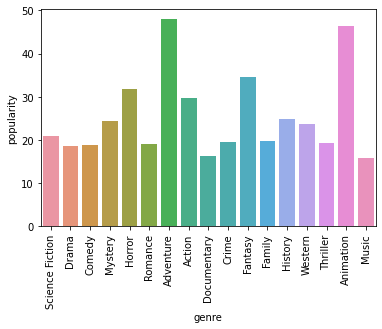

In [180]:
import seaborn as sns
p = sns.barplot('genre', 'popularity', data=movie_df, ci=False)
plt.xticks(rotation=90)

In [181]:
genre_group = movie_filtered.groupby('genre')
genre_group.head(5)

,popularity,budget,revenue,genre,title,release date,run time,movies_country
1,23.766,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
10,45.731,10000000,164874275,Horror,Saw III,2006-10-27,114,United States of America
11,48.223,4000000,147748505,Horror,Saw II,2005-10-28,89,United States of America
13,42.407,185000000,786636033,Adventure,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,122,United States of America
26,17.561,50000000,93974620,Drama,Syriana,2005-11-23,128,United States of America
38,12.956,30000000,47126295,Drama,High Fidelity,2000-03-17,113,United Kingdom
40,13.430,27000000,129000000,Drama,About a Boy,2002-04-26,101,United Kingdom
65,57.131,150000000,374218673,Action,Batman Begins,2005-06-10,140,United Kingdom
76,95.012,300000000,961000000,Adventure,Pirates of the Caribbean: At World's End,2007-05-19,168,United States of America
83,8.360,3000000,11718595,Comedy,Dave Chappelle's Block Party,2005-09-12,100,United States of America


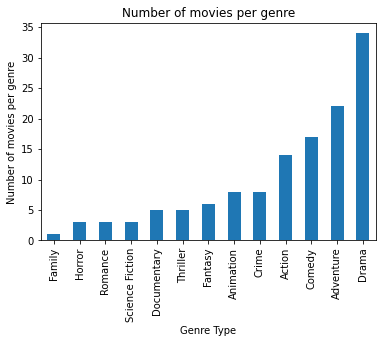

<Figure size 432x288 with 0 Axes>

In [182]:
movie_chart = genre_group['genre'].count()
movie_chart_sorted = movie_chart.sort_values()
movie_genre_count = movie_chart_sorted.plot(kind="bar", title="Number of movies per genre")
movie_genre_count.set_xlabel("Genre Type")
movie_genre_count.set_ylabel("Number of movies per genre")

#plt.xticks(rotation=45)
plt.show()
plt.tight_layout()


/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Science Fiction'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Mystery'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Documentary'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Music')])

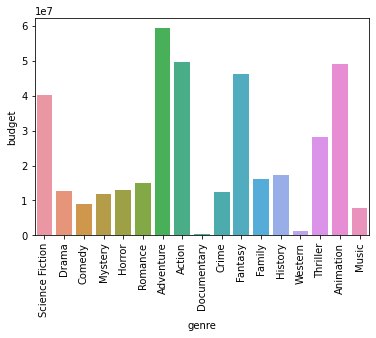

In [183]:
movie_filtered.groupby('genre', as_index=False)['budget'].mean()
p = sns.barplot('genre', 'budget', data=movie_df, ci=False)
plt.xticks(rotation=90)

/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Science Fiction'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Mystery'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Adventure'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Documentary'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Western'),
  Text(14, 0, 'Thriller'),
  Text(15, 0, 'Animation'),
  Text(16, 0, 'Music')])

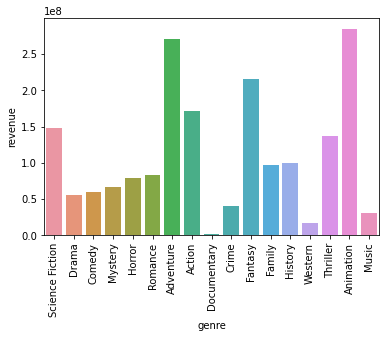

In [184]:
movie_filtered.groupby('genre', as_index=False)['revenue'].mean()
p = sns.barplot('genre', 'revenue', data=movie_df, ci=False)
plt.xticks(rotation=90)

In [8]:
movies

{'adult': False,
 'backdrop_path': '/cL1VX6WllejQQhGTUGGWHW25yor.jpg',
 'belongs_to_collection': None,
 'budget': 12000000,
 'genres': [{'id': 80, 'name': 'Crime'},
  {'id': 18, 'name': 'Drama'},
  {'id': 53, 'name': 'Thriller'}],
 'homepage': 'http://www.office-kitano.co.jp/brother/index.html',
 'id': 327,
 'imdb_id': 'tt0222851',
 'original_language': 'en',
 'original_title': 'Brother',
 'overview': 'A Japanese Yakuza gangster’s deadly existence in his homeland gets him exiled to Los Angeles, where he is taken in by his little brother and his brother’s gang.',
 'popularity': 11.479,
 'poster_path': '/rjgNhmndEKCPiIxK14bTr2FiwYR.jpg',
 'production_companies': [{'id': 528,
   'logo_path': '/fO3Aof3lXQclYpBByYC8aneTXwA.png',
   'name': 'Bandai Visual',
   'origin_country': 'JP'},
  {'id': 567,
   'logo_path': None,
   'name': 'Office Kitano',
   'origin_country': 'JP'},
  {'id': 569,
   'logo_path': '/hOurQBeeFI4OTTdAEtvGflbJgXU.png',
   'name': 'Tokyo FM',
   'origin_country': 'JP'},
 